In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
import yfinance as yf

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [62]:
def get_price_data(symbol):
    data = yf.download(symbol, period='1y')
    data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)
    data = pd.DataFrame(data)
    data = data.rename(columns = {'Close':symbol})
    return data

In [63]:
stock1 = get_price_data('AXISBANK.NS')
symbol_array = ['SBIN.NS',
'FEDERALBNK.NS',
'PNB.NS',
'INDUSINDBK.NS',
'AUBANK.NS',
'ICICIBANK.NS',
'IDFCFIRSTB.NS',
'RBLBANK.NS',
'KOTAKBANK.NS',
'HDFCBANK.NS',
'BANDHANBNK.NS'
]

[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


In [64]:
for i in range(len(symbol_array)):
    symbol = symbol_array[i]
    data1 = get_price_data(symbol)
    stock1[symbol] = data1
    

[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


[*********************100%***********************]  1 of 1 completed


C:\Users\Useer\AppData\Local\Temp/ipykernel_13748/2747401318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['High', 'Low', 'Adj Close', 'Volume', 'Open'], 1)


In [65]:
stock1

,AXISBANK.NS,SBIN.NS,FEDERALBNK.NS,PNB.NS,INDUSINDBK.NS,AUBANK.NS,ICICIBANK.NS,IDFCFIRSTB.NS,RBLBANK.NS,KOTAKBANK.NS,HDFCBANK.NS,BANDHANBNK.NS
Date,,,,,,,,,,,,
2021-04-19,648.150024,331.149994,71.949997,33.150002,832.000000,1015.849976,559.750000,50.700001,175.600006,1700.750000,1412.400024,304.899994
2021-04-20,651.750000,329.500000,72.099998,33.700001,845.000000,1041.300049,559.099976,50.650002,174.550003,1697.699951,1391.400024,309.149994
2021-04-22,658.700012,336.649994,71.750000,33.900002,835.700012,1094.449951,579.200012,51.200001,176.350006,1736.050049,1422.500000,309.500000
2021-04-23,671.349976,336.450012,72.050003,34.000000,850.000000,1075.500000,569.950012,51.099998,178.199997,1734.199951,1414.150024,313.450012
2021-04-26,700.450012,344.299988,73.949997,34.450001,859.549988,1051.500000,591.099976,52.250000,184.199997,1759.650024,1404.800049,313.149994
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,794.900024,516.099976,100.199997,37.750000,985.599976,1389.000000,754.299988,41.900002,128.100006,1784.500000,1514.650024,323.799988
2022-04-11,786.049988,514.900024,100.050003,37.450001,980.450012,1397.199951,759.599976,42.400002,131.250000,1783.449951,1496.150024,322.850006
2022-04-12,798.450012,512.849976,98.449997,36.750000,985.099976,1400.949951,763.849976,41.599998,131.750000,1801.849976,1493.500000,333.450012


Text(0.5, 1.0, 'Assets Correlation Matrix')

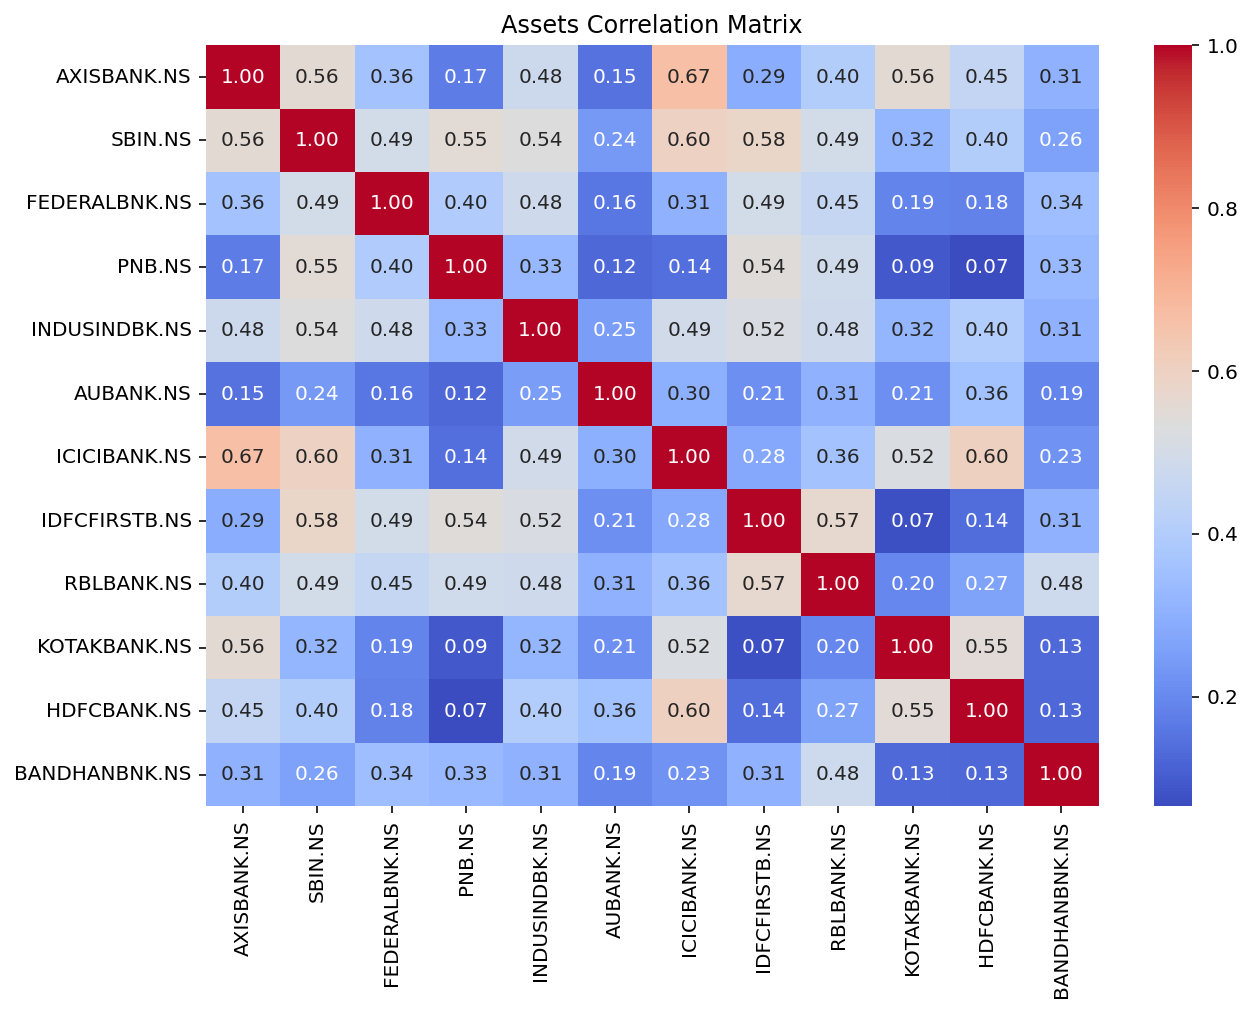

In [66]:
train_close, test_close = train_test_split(stock1, test_size=0.5, shuffle=False)



fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')


In [67]:
def cointegrated_pairs(data):
    n = data.shape[1]
    p_value_matrix = np.ones((n,n))
    keys = data.keys()
    pairs=[]
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            p_value_matrix[i,j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return p_value_matrix, pairs

[('AXISBANK.NS', 'IDFCFIRSTB.NS'), ('AXISBANK.NS', 'HDFCBANK.NS'), ('FEDERALBNK.NS', 'PNB.NS'), ('AUBANK.NS', 'IDFCFIRSTB.NS'), ('ICICIBANK.NS', 'IDFCFIRSTB.NS')]


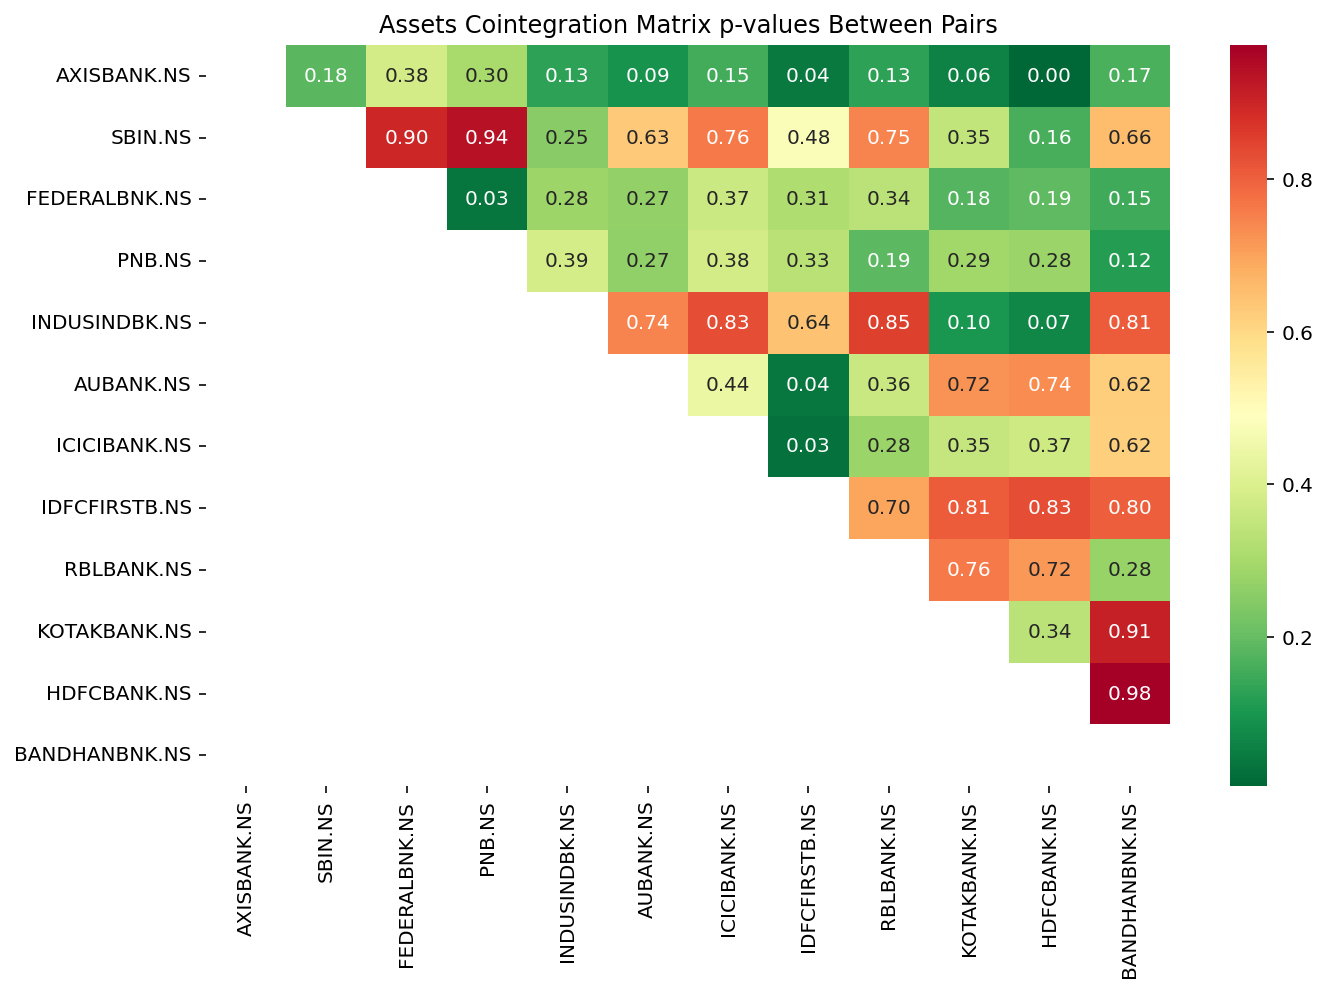

In [68]:
pvalues, pairs = cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()

In [69]:
asset1 = 'AXISBANK.NS'
asset2 = 'ICICIBANK.NS'

In [70]:
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]


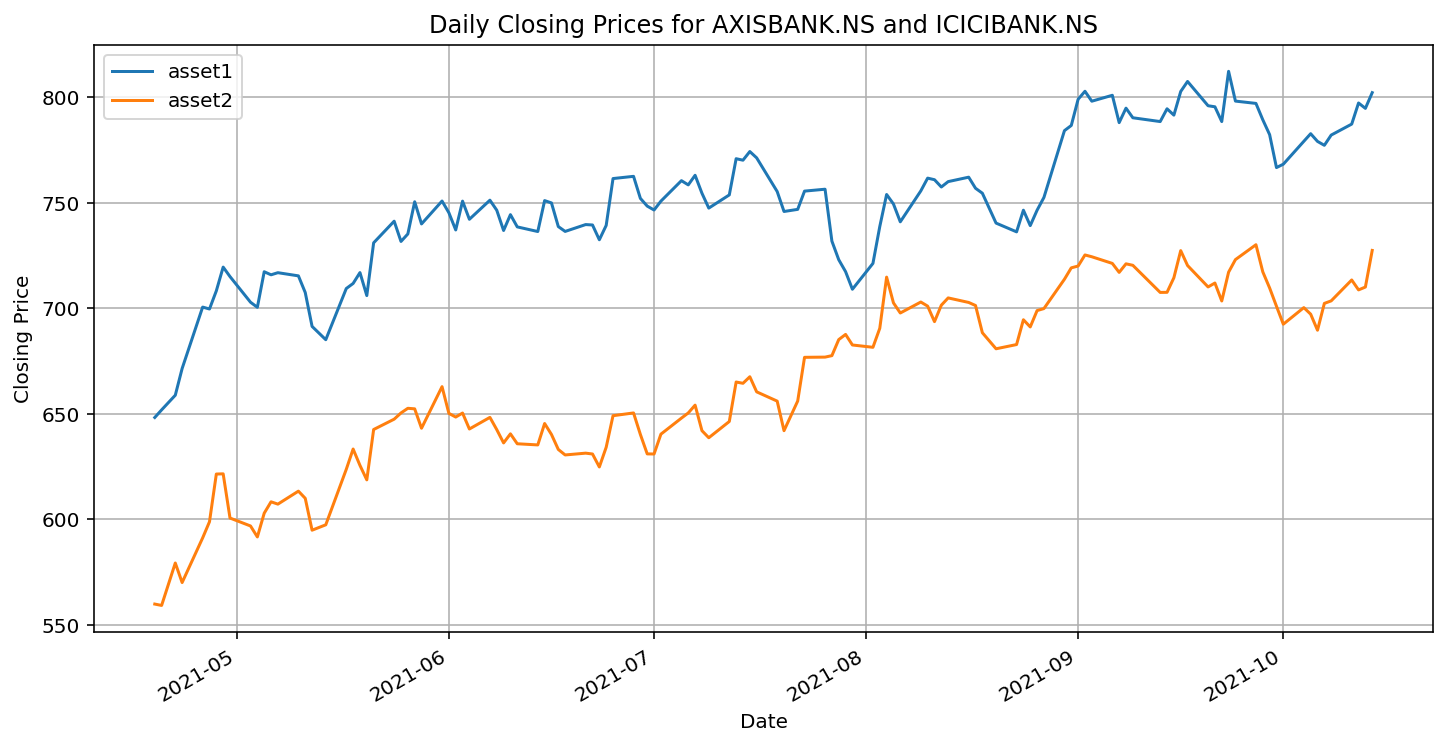

In [71]:
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);

In [72]:
model=sm.OLS(train.asset2, train.asset1).fit()

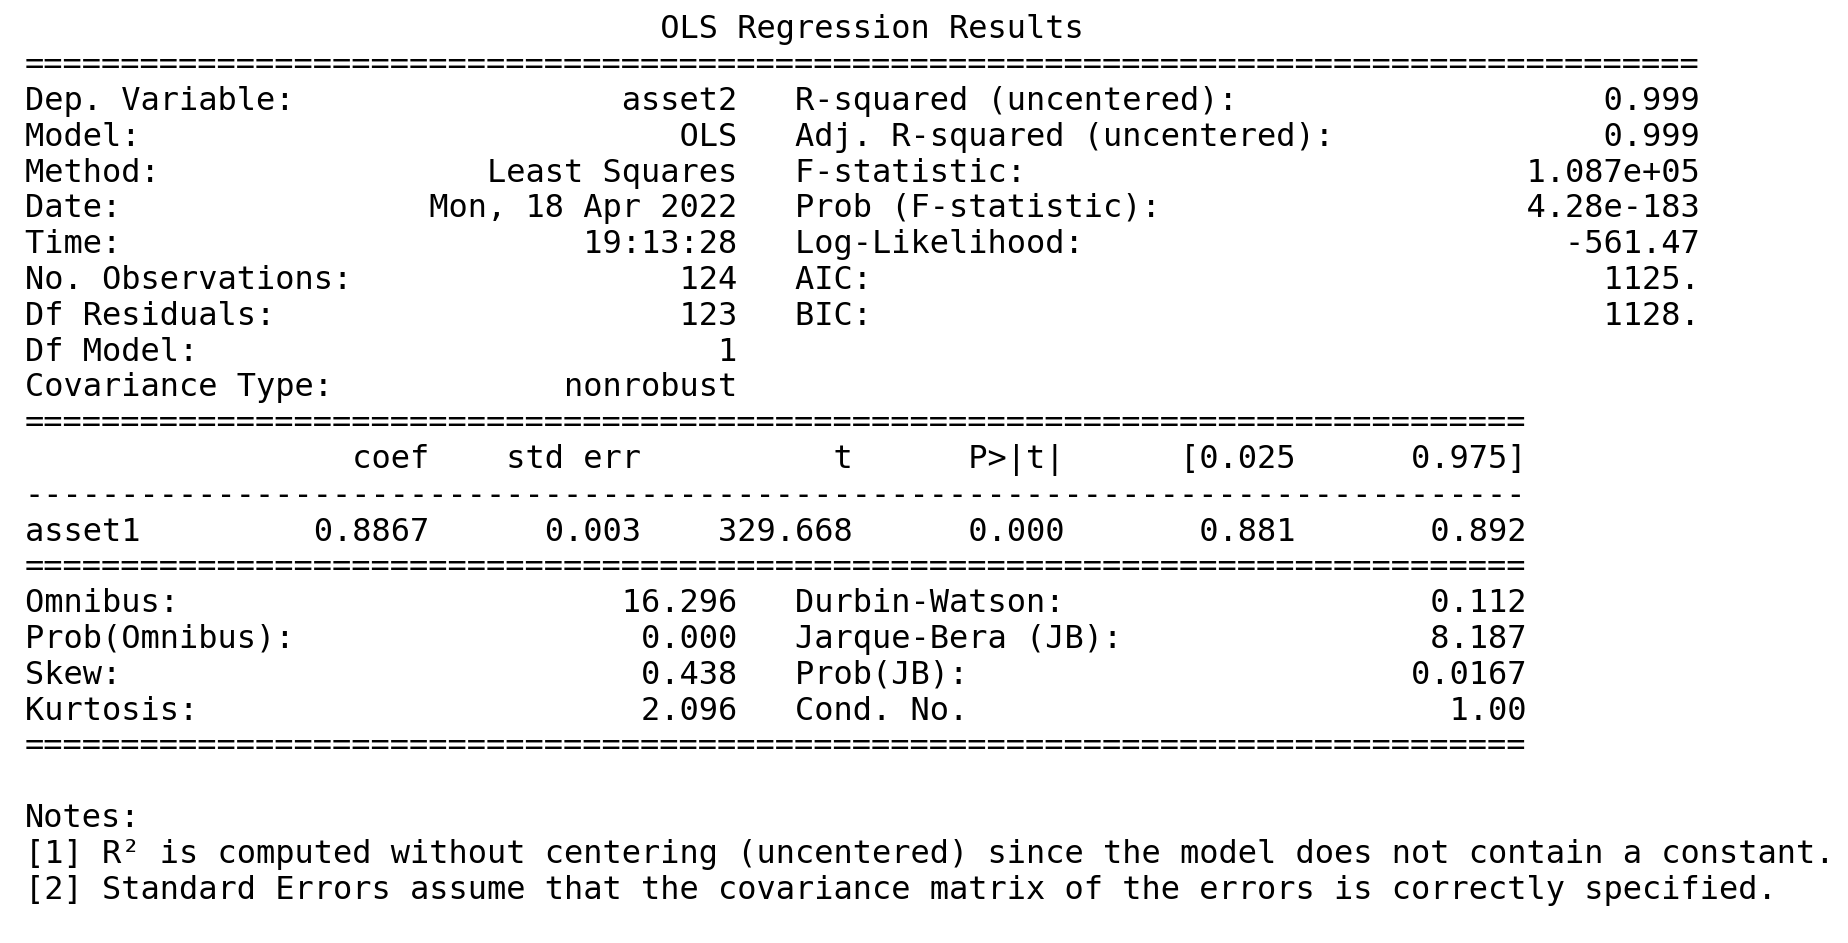

In [73]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)

In [74]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.8867198530840062


In [75]:
spread = train.asset2 - model.params[0] * train.asset1


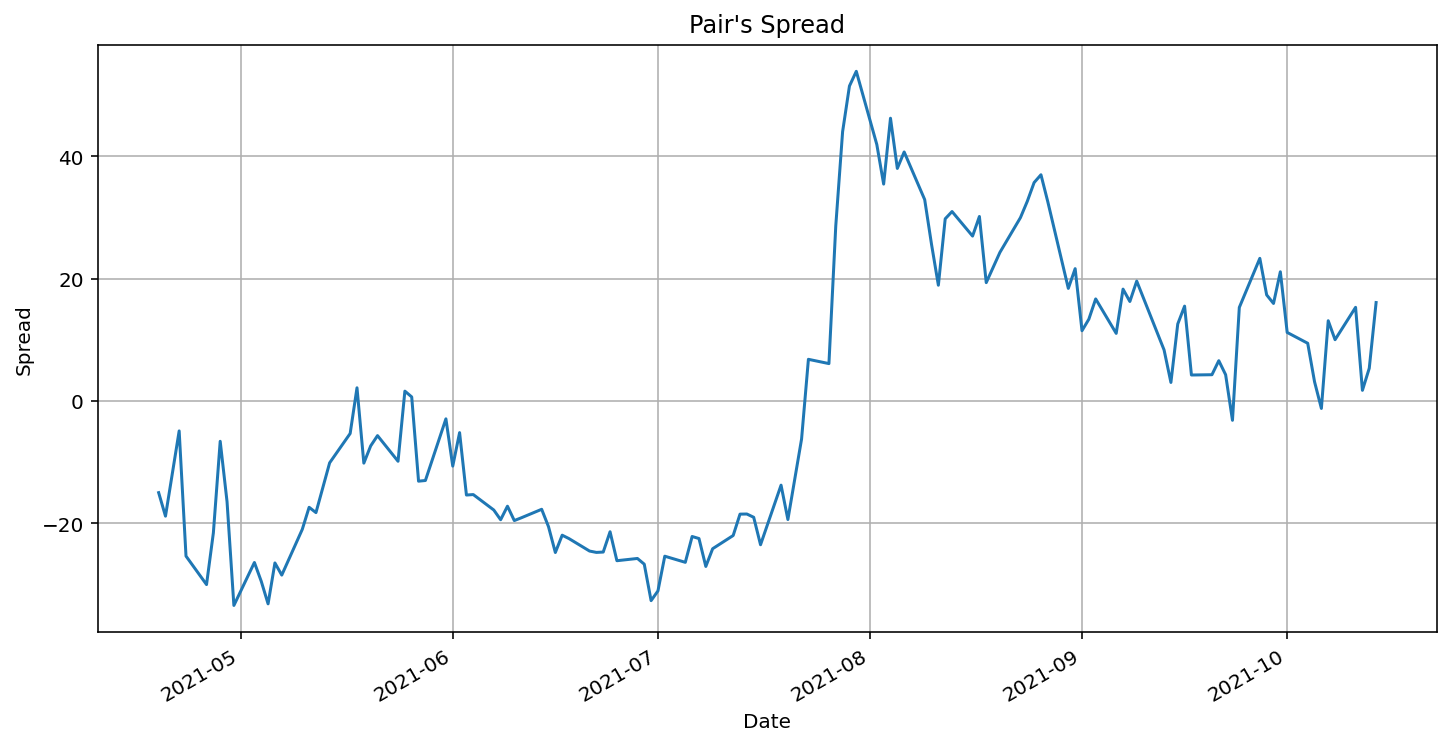

In [76]:
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True);

In [77]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

In [78]:
signals.head(3).append(signals.tail(3))

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
Date,,,,,,,,,
2021-10-18,813.299988,745.450012,2.017943,1.0,-1.0,-1,NaN,1,NaN
2021-10-19,801.650024,747.450012,1.694188,1.0,-1.0,-1,0.0,1,0.0
2021-10-20,804.799988,745.849976,1.808328,1.0,-1.0,-1,0.0,1,0.0
2022-04-12,798.450012,763.849976,1.218040,1.0,-1.0,-1,0.0,1,0.0
2022-04-13,793.049988,762.250000,1.132485,1.0,-1.0,-1,0.0,1,0.0
2022-04-18,798.849976,757.799988,1.373273,1.0,-1.0,-1,0.0,1,0.0


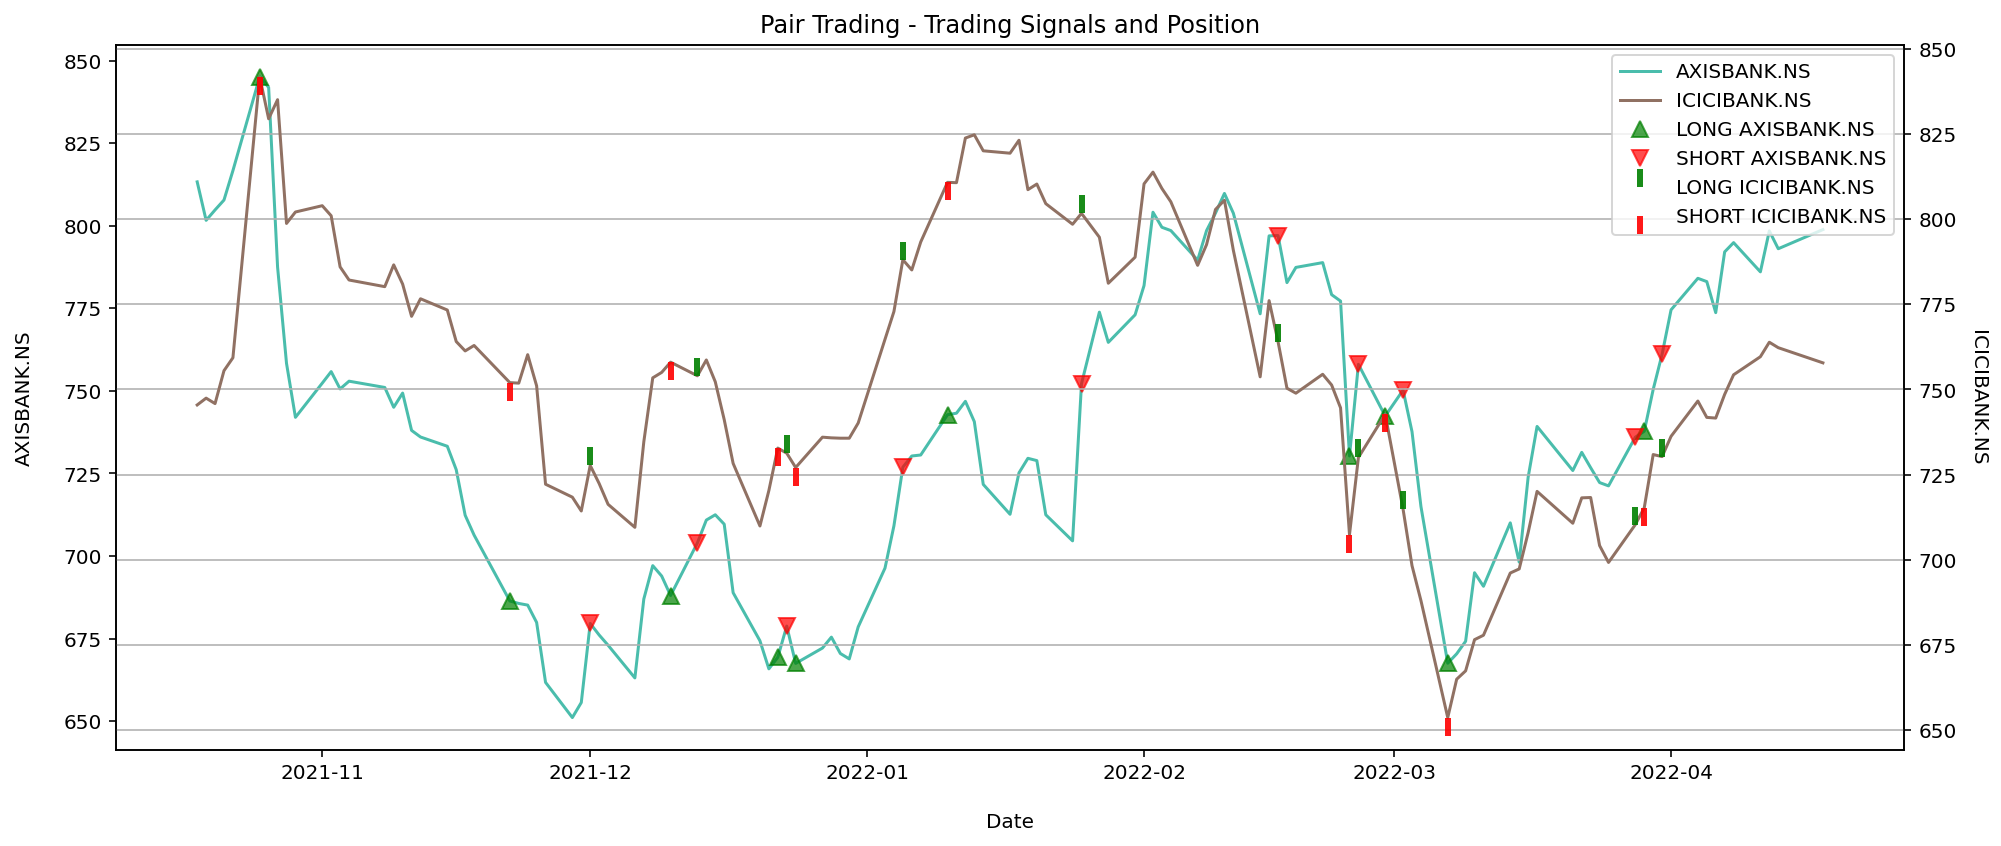

In [79]:
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Date')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best')

plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

In [80]:
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']
# portfolio.head().append(portfolio.tail())
# portfolio[portfolio.positions1 != 0].head()
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']
# portfolio.to_csv('data/portfolio.csv')
# portfolio.head().append(portfolio.tail())
# portfolio[portfolio.positions2 != 0].head()
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

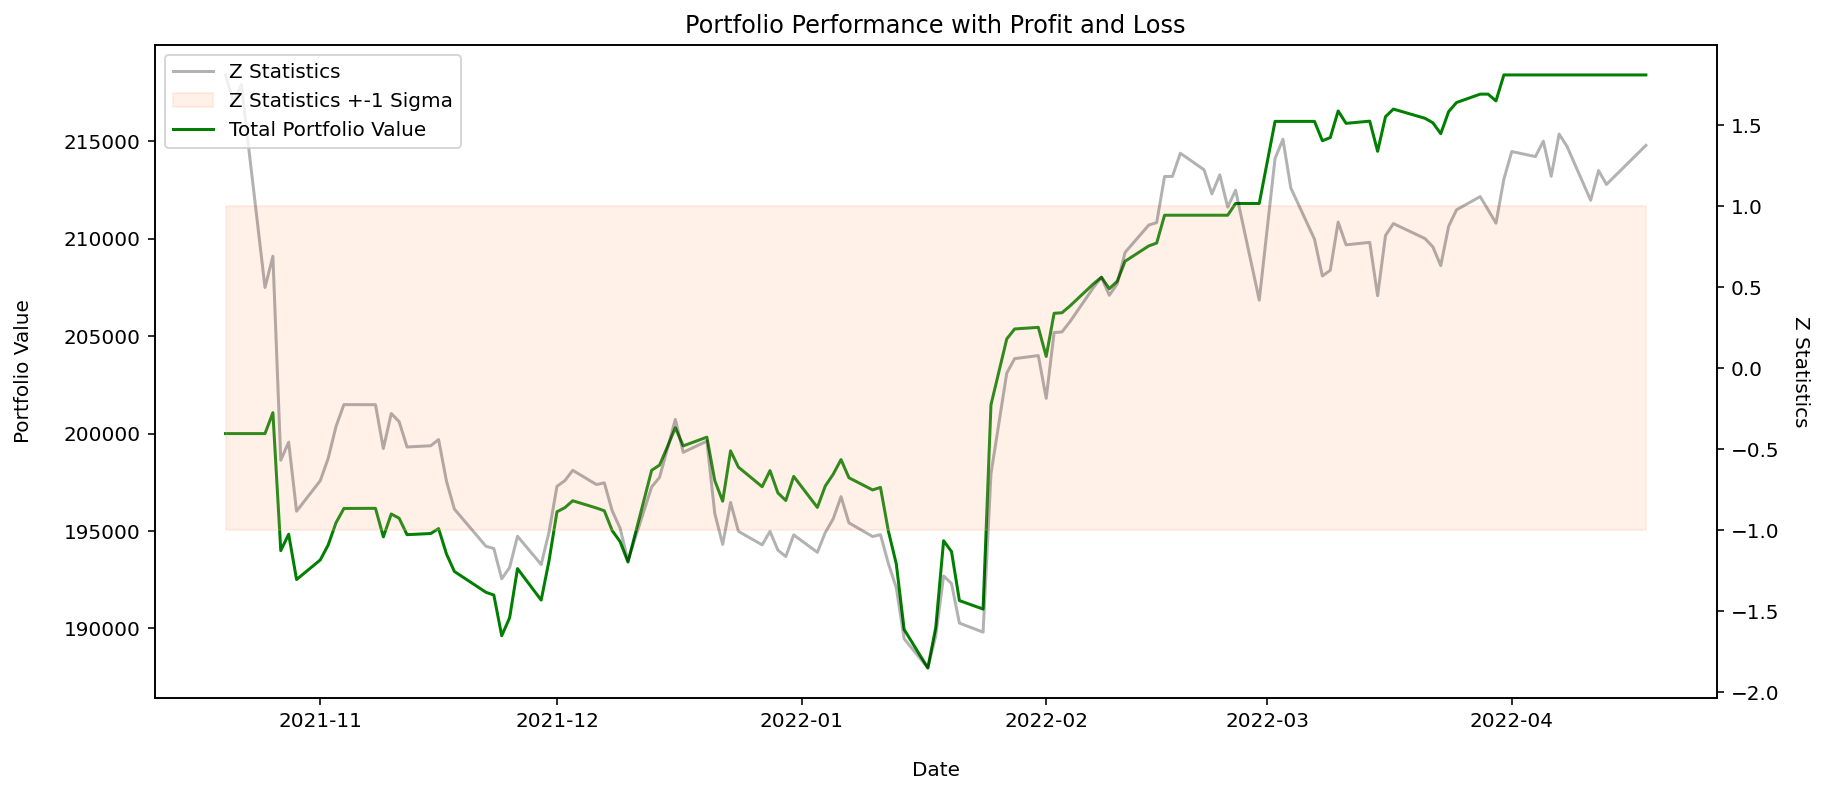

In [81]:
fig = plt.figure(figsize=(14,6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');

In [82]:
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0]).days
print('Number of days = ', delta)

Number of days =  180


In [83]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
abs_ret = ((final_portfolio-initial_capital)/initial_capital)*100
print('CAGR = {:.3f}%' .format(returns * 100))
print('Absolute returns: ', abs_ret, '%') 

CAGR = 387.458%
Absolute returns:  118.40211584472655 %
